# 1A 2D 3B 4B 5C

# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.


**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.


**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


In [ ]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu111/torch-1.10.0%2Bcu111-cp37-cp37m-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu111/torchaudio-0.10.0%2Bcu111-cp37-cp37m-linux_x86_64.whl
torchsummary==1.5.1
torchtext==0.11.0
torchvision @ https://download.pytorch.org/whl/cu111/torchvision-0.11.1%2Bcu111-cp37-cp37m-linux_x86_64.whl


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td


6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

In [ ]:
t = torch.randn(32,32, 3)
t.dtype

torch.float32

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

In [ ]:
R=t[:,:,0]
G=t[:,:,1]
B=t[:,:,2]

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

In [ ]:

# hadamard
hadamard= R*G
# normal
normal = R.mm(G)

9) Từ bộ dữ liệu Income-Classification hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20.

In [ ]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%  matplotlib inline


import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income_classification/income_class_train.csv")
train.head(5)

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income_classification/income_class_test.csv")
test.head(5)

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality
0,25000,59,Self-emp-not-inc,104216,Prof-school,15,Married-civ-spouse,Sales,Husband,White,M,0,0,25,US
1,25001,41,Private,76625,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US
2,25002,66,Self-emp-not-inc,28061,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,M,0,0,50,US
3,25003,29,Private,211299,Assoc-voc,11,Never-married,Sales,Not-in-family,Black,M,0,0,45,US
4,25004,35,Private,340110,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,0,1848,70,US


In [ ]:
import numpy as np
import random
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

# normalize string
def str_normalize(s):
    # convert into lowercase and replace multiple spaces into single space
    s = str(s).strip().lower()
    s = re.sub(' +', " ", s)
    return s
# Encode category and object columns 
def process(df):        
  for col in df.columns:
      if df[col].dtype.name == "object" or df[col].dtype.name == "category":
          df[col] = df[col].apply(str_normalize).astype("category")
  return df
train = process(train.copy())
IDs= train.pop('ID')
label = train.pop('target_income')
df_all_one_hot = pd.get_dummies(train)

In [ ]:
label

0        0
1        0
2        0
3        0
4        0
        ..
24995    1
24996    0
24997    0
24998    0
24999    0
Name: target_income, Length: 25000, dtype: int64

In [ ]:
features = df_all_one_hot.columns.tolist()
label = label.values

In [ ]:
features = df_all_one_hot.columns.tolist()

# label = 'target_income'

# x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot[features].values, # input variable
#                                                     label, # output variable
#                                                     test_size=0.2 # test dataset proportion
#                                                     # stratify=df_all['target_income'], # assign equal proportion of target label in train/test 
#                                                     random_state=42) # keep train/test split the same if run again. 
x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot, label, test_size=0.2, random_state=0)
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



In [ ]:
target_income = ['0', '1']
print(df_all_one_hot.columns[0:].values, 'target_income')
for index, row in df_all_one_hot.sample(10).iterrows():
    print('[',row[1], row[2], row[7],row[8], row[9], row[43], row[48],
          int(row[11]), ']',target_income[int(row[11])])

['age' 'final_weight' 'total_education_yrs' 'capital_gain' 'capital_loss'
 'hrs_per_week' 'work_type_?' 'work_type_federal-gov'
 'work_type_local-gov' 'work_type_never-worked' 'work_type_private'
 'work_type_self-emp-inc' 'work_type_self-emp-not-inc'
 'work_type_state-gov' 'work_type_without-pay' 'education_10th'
 'education_11th' 'education_12th' 'education_1st-4th' 'education_5th-6th'
 'education_7th-8th' 'education_9th' 'education_assoc-acdm'
 'education_assoc-voc' 'education_bachelors' 'education_doctorate'
 'education_hs-grad' 'education_masters' 'education_preschool'
 'education_prof-school' 'education_some-college' 'marital_state_divorced'
 'marital_state_married-af-spouse' 'marital_state_married-civ-spouse'
 'marital_state_married-spouse-absent' 'marital_state_never-married'
 'marital_state_separated' 'marital_state_widowed' 'job_?'
 'job_adm-clerical' 'job_armed-forces' 'job_craft-repair'
 'job_exec-managerial' 'job_farming-fishing' 'job_handlers-cleaners'
 'job_machine-op-ins

In [ ]:
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + label[y_train[n]] + ')')

Sample of features and labels:


TypeError: ignored

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.

In [ ]:
# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


# Prepare the data for PyTorch

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


# Define a neural network

In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class income_classification(nn.Module):
    def __init__(self):
        super(income_classification, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        # self.fc3 = nn.Linear(hl, len(target_income))
        self.fc3 = nn.Linear(hl, 6)
        self.fc4 = nn.Linear(6, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        #x = torch.relu(self.fc4(x))
        x = torch.softmax(self.fc4(x))
        # ham softmax hoac sigmoid bien doi 1 vector bat ki (vector a3) thanh xac suat gom cac unit trong phan loai ( o day la 2 unit)
        return x

# Create a model instance from the network
model = income_classification()
print(model)

income_classification(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)


In [ ]:
# # Define a classifier network
# hl = 10 # Number of hidden layer nodes

# def _init_model(hl = 10):
#   model = Sequential()
#   model.add(Dense(hl, input_dim=len(features), activation='relu'))
#   model.add(Dense(hl, input_dim=hl, activation='relu'))
#   model.add(Dense(6, input_dim=hl, activation='relu'))
#   model.add(Dense(1, input_dim=6, activation='sigmoid'))
#   print(model.summary())
#   return model

# model = _init_model(hl=hl)

# Train the model

In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            #_, predicted = torch.max(out.data, 1)
            # Do danh du bao theo nhan phan loai 0-1 nen phai kiem tra >= 0.5 voi gia tri thu 2.
            # _, : khoong can quan tam gia tri tra ve. Skip gia tri do. 
            _, predicted = torch.tensor(out.data[: ,1] >= 0.5).float()
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 0.395484
Validation set: Average loss: 0.347482, Accuracy: 3811/5000 (76%)

Epoch: 2
Training set: Average loss: 0.353986
Validation set: Average loss: 0.345916, Accuracy: 3811/5000 (76%)

Epoch: 3
Training set: Average loss: 0.350232
Validation set: Average loss: 0.343408, Accuracy: 3811/5000 (76%)

Epoch: 4
Training set: Average loss: 0.347412
Validation set: Average loss: 0.344013, Accuracy: 3811/5000 (76%)

Epoch: 5
Training set: Average loss: 0.345495
Validation set: Average loss: 0.345302, Accuracy: 3811/5000 (76%)

Epoch: 6
Training set: Average loss: 0.343969
Validation set: Average loss: 0.346161, Accuracy: 3811/5000 (76%)

Epoch: 7
Training set: Average loss: 0.342028
Validation set: Average loss: 0.349423, Accuracy: 3811/5000 (76%)

Epoch: 8
Training set: Average loss: 0.340830
Validation set: Average loss: 0.347928, Accuracy: 3811/5000 (76%)

Epoch: 9
Training set: Average loss: 0.339722
Validation set: Average loss: 0.348907, Accuracy: 

# Đánh giá model

**Review training and validation loss**

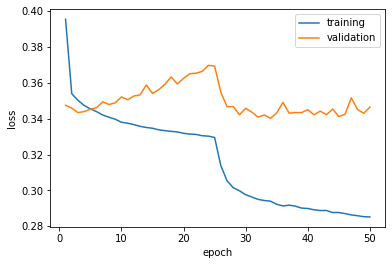

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

**View the learned weights and biases**

## View the learned weights and biases

The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
* Layer 1: There are four input values going to ten output nodes, so there should be 10 x 4 weights and 10 bias values.
* Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
* Layer 3: There are ten input values going to 25000 output nodes, so there should be 25000 x 10 weights and 25000 bias values.

In [ ]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[ 5.5407929e-01  9.9949218e-02 -1.1042611e-01 ...  2.2912748e-01
   1.1259344e-01 -1.9716609e-02]
 [-1.3544717e+00 -2.7166858e-01  3.5510308e-01 ...  7.1875095e-01
   1.3125372e-01  8.5618660e-02]
 [ 1.3245031e+00  3.2656372e-02  9.1842741e-02 ...  3.2320386e-01
  -9.3625300e-02 -2.4617756e-02]
 ...
 [ 3.0612412e-01  2.5534153e-01 -8.9462750e-02 ...  5.6377459e-01
  -1.9884299e-02  2.7759856e-02]
 [-6.3473153e-01 -5.2190161e-01 -1.5058084e-01 ...  4.6566367e-01
   1.1389263e-01  1.1507821e-03]
 [-9.1723323e-01 -1.7794234e-01 -7.6087333e-02 ...  3.5662344e-01
  -2.5364143e-01 -2.1998788e-01]]
fc1.bias 
 [-0.21409047 -0.36730164  0.02390506  0.13195585  0.03121356 -0.3728606
  0.19681771 -0.3780457  -0.271961    0.26531842]
fc2.weight 
 [[ 0.4270029   0.19554594  0.3209807   0.1853114  -0.12627518  0.05167822
  -0.27895242  0.51500654  0.11154748  0.07521031]
 [-0.0768678   0.2925458  -1.2706543   0.06273068 -0.17373636  0.4203422
  -0.145478    0.21242167  0.17135139  0.22

# Evaluate model performance

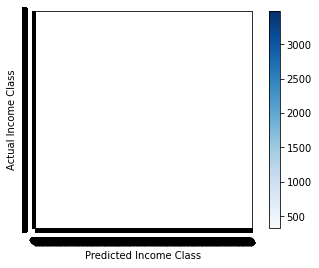

In [ ]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label))
plt.xticks(tick_marks, label, rotation=45)
plt.yticks(tick_marks, label)
plt.xlabel("Predicted Income Class")
plt.ylabel("Actual Income Class")
plt.show()

# PANDAS HOMEWORK

Sử dụng bộ dữ liệu Churn Customer bạn hãy.

1. Đọc dữ liệu từ file csv, có phần header là row thứ nhất và index là trường RowNumber.
2. Thống kê mô tả đối với các trường trong bảng dữ liệu này.
3. Tính trung bình điểm CreditScore theo Geography.
4. Phân đều Age thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát.
5. Vẽ biểu đồ barchart thống kê số lượng khách hàng theo nhóm độ tuổi vừa tạo được.



In [ ]:
churn = pd.read_csv('https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/Churn_Modelling.csv', header = 1, index_col=0)
churn.head(5)

df_churn = pd.read_csv('https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/Churn_Modelling.csv')

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Tính trung bình điểm CreditScore theo Geography.

In [ ]:
from numpy.ma.extras import average
df_churn.groupby('Geography')['CreditScore'].apply(lambda x: average(x))

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

Phân đều Age thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát.

In [ ]:
df_churn["Age"]

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [ ]:
df_churn["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
# Phân đều Age thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát
   
df_churn["Age"] = pd.cut(x=df_churn['Age'], bins=[18,30,40,60,70,100], labels=["young","young middle-aged","middle-aged","old","very old"])

TypeError: ignored

In [ ]:
df_churn["Age"].unique()

['middle-aged', 'young middle-aged', 'young', 'old', 'very old', NaN]
Categories (5, object): ['young' < 'young middle-aged' < 'middle-aged' < 'old' < 'very old']

Vẽ biểu đồ barchart thống kê số lượng khách hàng theo nhóm độ tuổi vừa tạo được.

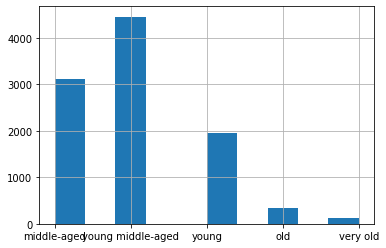

In [ ]:

df_churn["Age"].hist()

# NUMPY HOMEWORK



In [ ]:
import numpy as np

A = np.array([[10, 1, 2],
              [9, 7, 4],
              [0, 2, 1]])

B = np.array([[2, 3, 4],
              [0, 4, 2],
              [3, 2, 1]])

In [ ]:
A.T

array([[10,  9,  0],
       [ 1,  7,  2],
       [ 2,  4,  1]])

In [ ]:
B.T

array([[2, 0, 3],
       [3, 4, 2],
       [4, 2, 1]])

In [ ]:
# Tich AB 
M= A@B 

# Tich BA(t)AB(t)
N = B@A.T@A@B.T

#Tich AB(t)BA(t)
NN = A@B.T@B@A.T

In [ ]:
N


array([[4086, 2328, 3579],
       [2328, 1460, 1942],
       [3579, 1942, 3206]])

In [ ]:
NN

array([[2181, 3523,  560],
       [3523, 6346, 1135],
       [ 560, 1135,  225]])

Nhận xét gì về kết quả của biểu thức 3 và biểu thức 2?


ket qua cua bieu thuc 3 va bieu thuc 2 khac nhau. 

In [ ]:
# rank(A)
print('rank(A)',np.linalg.matrix_rank(A))

# det(A)
print('det(A)',np.linalg.det(A))

# trace(A)
print("trace of A: ", np.trace(A))
# A^(-1)

print("Inverse A:\n ",np.linalg.pinv(A))

rank(A) 3
det(A) 16.999999999999993
trace of A:  18
Inverse A:
  [[-0.05882353  0.17647059 -0.58823529]
 [-0.52941176  0.58823529 -1.29411765]
 [ 1.05882353 -1.17647059  3.58823529]]


In [ ]:
# - concatenate ma trận A và ma trận B theo dòng.
# Stack theo chiều horizontal
print(np.hstack([A, B]).shape)
# AB = np.concatenate((A, B), axis=1)
# print("shape after concatenate: ", AB.shape)

# - Reshape ma trận A thành véc tơ
print("A.shape: ", A.shape)

(3, 6)
shape after concatenate:  (3, 6)
A.shape:  (3, 3)


In [ ]:
A

array([[10,  1,  2],
       [ 9,  7,  4],
       [ 0,  2,  1]])

In [ ]:

# Phân phối xác suất sau khi đi qua hàm softmax các dòng của A
E = np.exp(A)
P = []

for i in range(E.shape[0]):
  Ei = E[i, :]
  pi = Ei/np.sum(Ei)
  P.append(pi)

P = np.array(P)
print('Matrix Phân phối xác suất P:',P)
# Tìm ra nhãn dự báo cho mỗi dòng.
print('indice có giá trị lớn nhất của A row 1',np.argmax(A, axis=1))
print('indice có giá trị nho nhất của A row 1',np.argmin(A, axis=1))

# Tính tổng, trung bình, min, max của mỗi dòng.
print('max row 1 cua A:',A.max(axis=1))
print('min row 1 cua A:',A.min(axis=1))
print('mean row 1 cua A:', A.mean(axis=1))
print('sum row 1 cua A:', A.sum(axis=1))

Matrix Phân phối xác suất P: [[9.99541338e-01 1.23353201e-04 3.35308764e-04]
 [8.75600595e-01 1.18499655e-01 5.89975040e-03]
 [9.00305732e-02 6.65240956e-01 2.44728471e-01]]
indice có giá trị lớn nhất của A row 1 [0 0 1]
indice có giá trị nho nhất của A row 1 [1 2 0]
max row 1 cua A: [10  9  2]
min row 1 cua A: [1 4 0]
mean row 1 cua A: [4.33333333 6.66666667 1.        ]
sum row 1 cua A: [13 20  3]
